,TM,TX,TN,HRM,PPT,PM,Volum
Dia,,,,,,,
2007-01-01,5.0,11.9,2.6,86.0,0.0,930.5,45.9998
2007-01-02,4.1,9.2,0.4,90.0,0.0,931.0,45.6842
2007-01-03,3.4,11.7,-1.2,85.0,0.0,931.0,45.3899
2007-01-04,6.1,13.8,2.2,71.0,0.0,925.2,45.0581
2007-01-05,4.8,11.9,1.2,76.0,0.0,925.6,44.7474
2007-01-06,5.7,13.4,1.0,78.0,0.0,926.8,44.4769
2007-01-07,7.1,14.3,1.9,71.0,0.0,924.6,44.0925
2007-01-08,4.1,9.5,0.4,84.0,0.0,921.4,43.8250
2007-01-09,8.1,15.8,2.5,72.0,0.0,923.6,43.5207


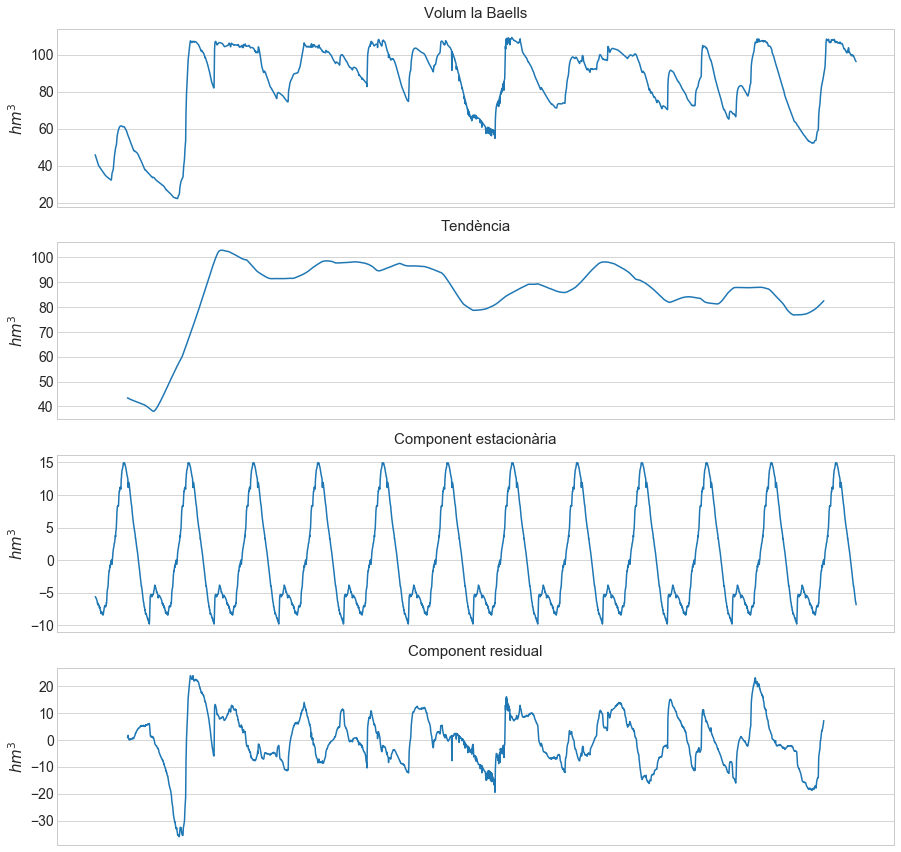

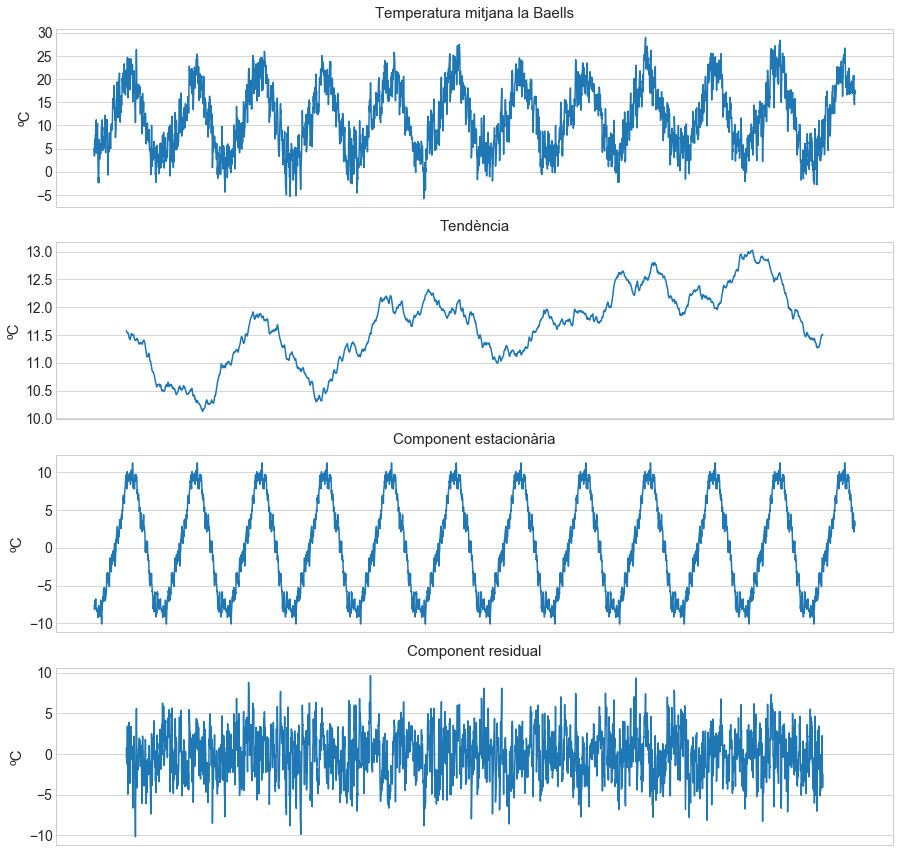

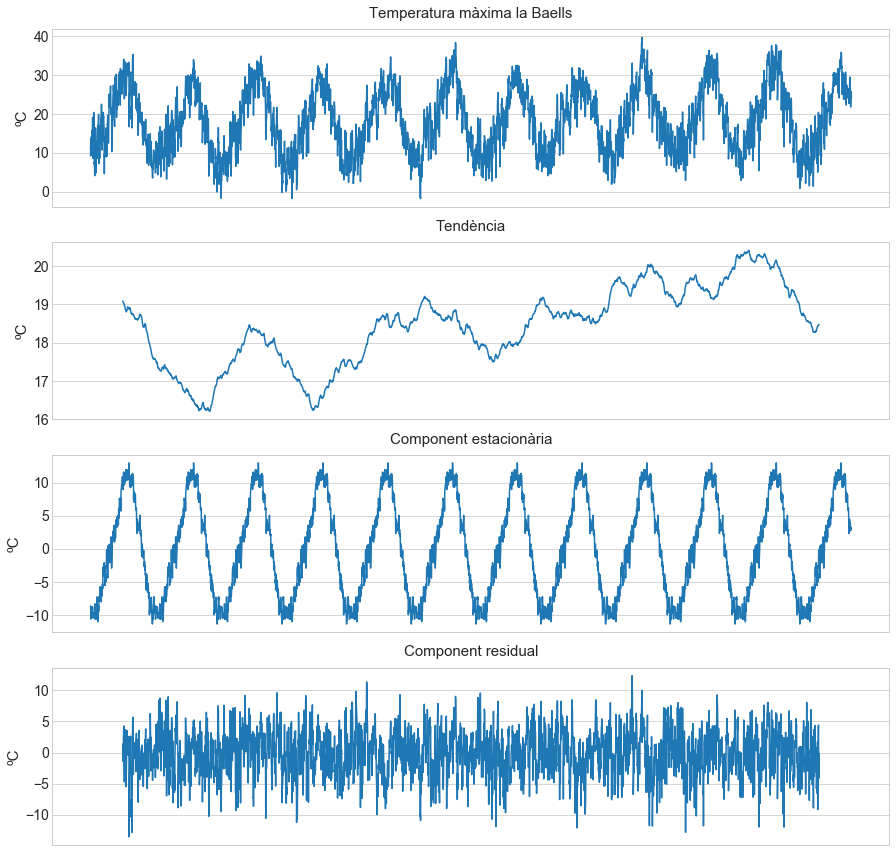

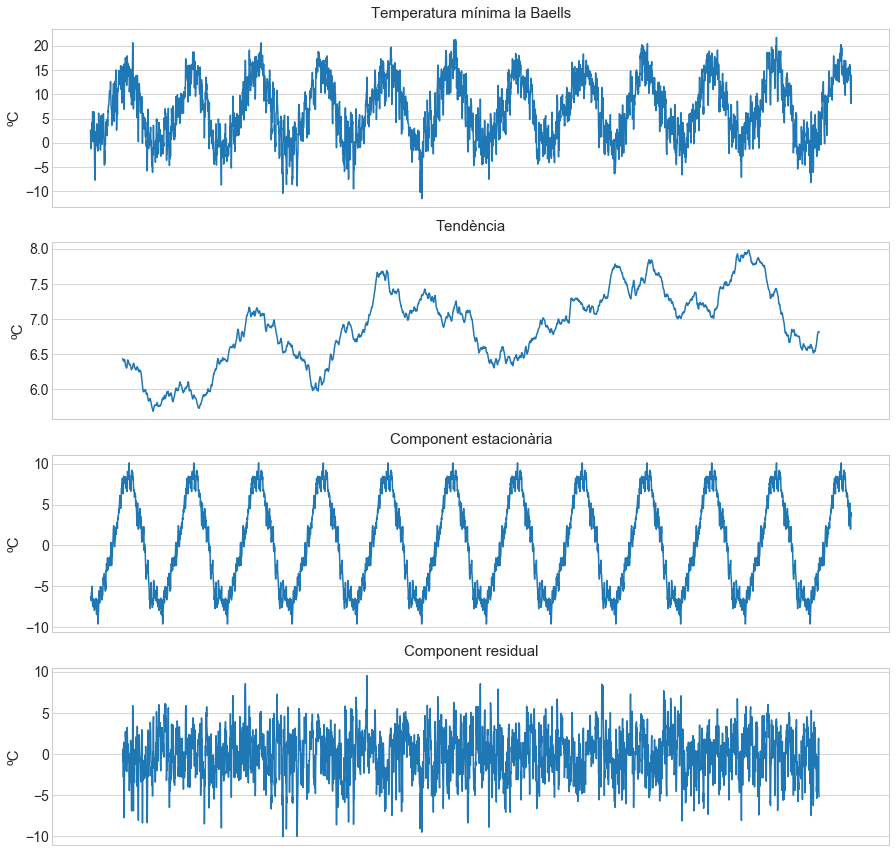

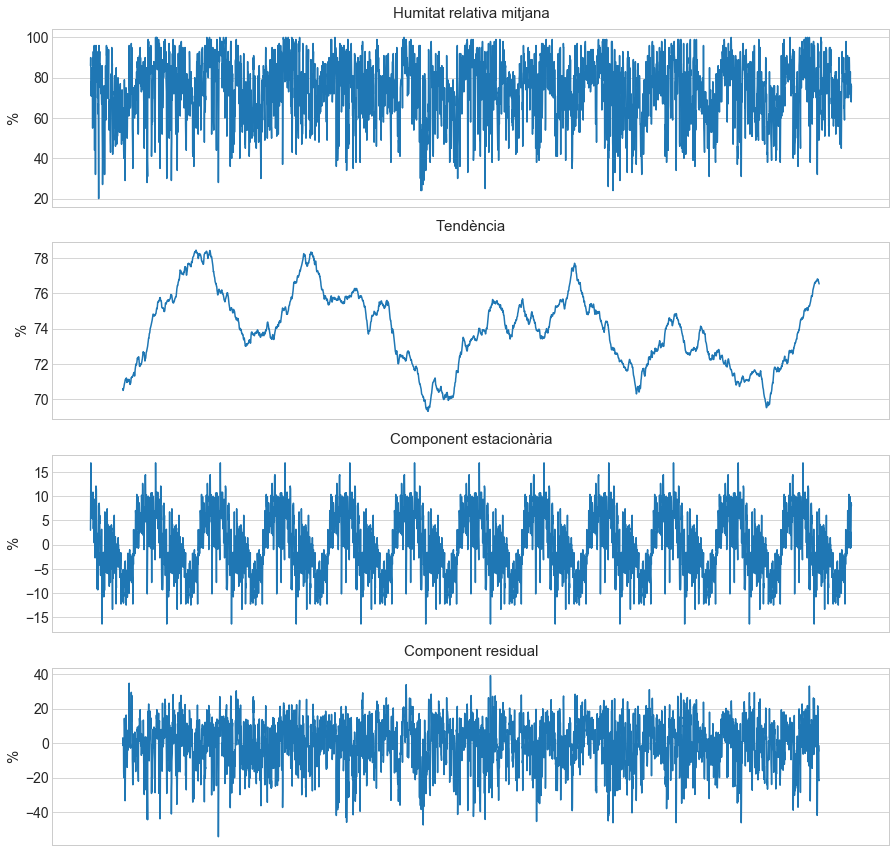

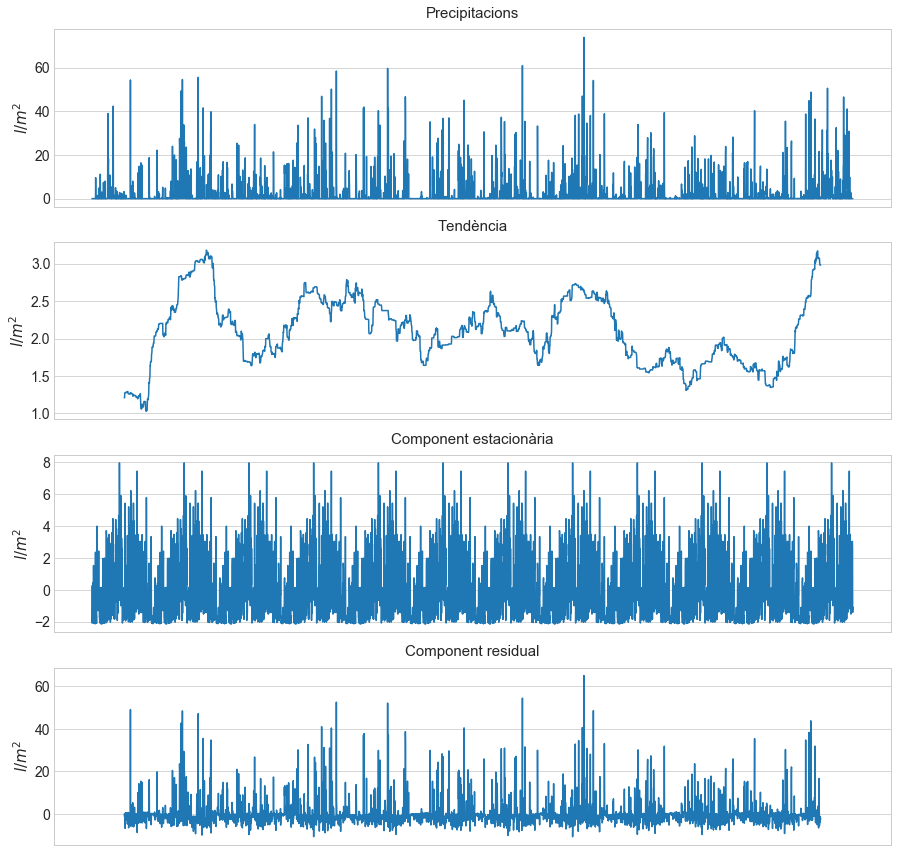

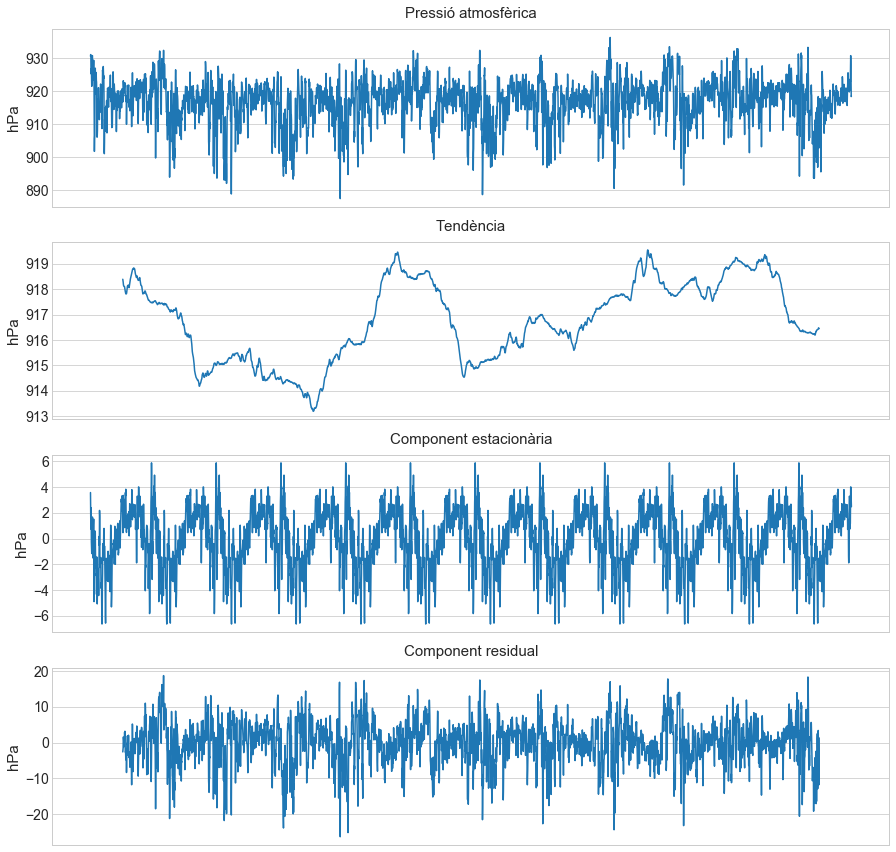

In [2]:

import loadSau
import labaells
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd
from pandas import read_csv
% matplotlib inline
baellsDades = read_csv('dadesBaellsMulti.csv', sep=';',header=0, index_col=0)
baellsDades = pd.DataFrame(baellsDades.loc[baellsDades.index >= '2007-01-01'])

display(baellsDades[0:10])

# Ejemplo de descomposición de serie de tiempo
descomp_serie = sm.tsa.seasonal_decompose(baellsDades['Volum'], model='additive', freq=365)  

var_graf = ((baellsDades.index, descomp_serie.observed, 'Volum la Baells','$hm^3$'),(baellsDades.index, descomp_serie.trend, 'Tendència','$hm^3$'),
               (baellsDades.index, descomp_serie.seasonal, 'Component estacionària','$hm^3$'),(baellsDades.index, descomp_serie.resid, 'Component residual','$hm^3$'))

loadSau.grafica_series_multi(var_graf)

descomp_serie = sm.tsa.seasonal_decompose(baellsDades['TM'], model='additive', freq=365)  

var_graf = ((baellsDades.index, descomp_serie.observed, 'Temperatura mitjana la Baells','ºC'),(baellsDades.index, descomp_serie.trend, 'Tendència','ºC'),
               (baellsDades.index, descomp_serie.seasonal, 'Component estacionària','ºC'),(baellsDades.index, descomp_serie.resid, 'Component residual','ºC'))

loadSau.grafica_series_multi(var_graf)

descomp_serie = sm.tsa.seasonal_decompose(baellsDades['TX'], model='additive', freq=365)  

var_graf = ((baellsDades.index, descomp_serie.observed, 'Temperatura màxima la Baells','ºC'),(baellsDades.index, descomp_serie.trend, 'Tendència','ºC'),
               (baellsDades.index, descomp_serie.seasonal, 'Component estacionària','ºC'),(baellsDades.index, descomp_serie.resid, 'Component residual','ºC'))

loadSau.grafica_series_multi(var_graf)

descomp_serie = sm.tsa.seasonal_decompose(baellsDades['TN'], model='additive', freq=365)  

var_graf = ((baellsDades.index, descomp_serie.observed, 'Temperatura mínima la Baells','ºC'),(baellsDades.index, descomp_serie.trend, 'Tendència','ºC'),
               (baellsDades.index, descomp_serie.seasonal, 'Component estacionària','ºC'),(baellsDades.index, descomp_serie.resid, 'Component residual','ºC'))

loadSau.grafica_series_multi(var_graf)

descomp_serie = sm.tsa.seasonal_decompose(baellsDades['HRM'], model='additive', freq=365)  

var_graf = ((baellsDades.index, descomp_serie.observed, 'Humitat relativa mitjana','%'),(baellsDades.index, descomp_serie.trend, 'Tendència','%'),
               (baellsDades.index, descomp_serie.seasonal, 'Component estacionària','%'),(baellsDades.index, descomp_serie.resid, 'Component residual','%'))

loadSau.grafica_series_multi(var_graf)

descomp_serie = sm.tsa.seasonal_decompose(baellsDades['PPT'], model='additive', freq=365)  

var_graf = ((baellsDades.index, descomp_serie.observed, 'Precipitacions','$l/m^2$'),(baellsDades.index, descomp_serie.trend, 'Tendència','$l/m^2$'),
               (baellsDades.index, descomp_serie.seasonal, 'Component estacionària','$l/m^2$'),(baellsDades.index, descomp_serie.resid, 'Component residual','$l/m^2$'))

loadSau.grafica_series_multi(var_graf)

descomp_serie = sm.tsa.seasonal_decompose(baellsDades['PM'], model='additive', freq=365)  

var_graf = ((baellsDades.index, descomp_serie.observed, 'Pressió atmosfèrica','hPa'),(baellsDades.index, descomp_serie.trend, 'Tendència','hPa'),
               (baellsDades.index, descomp_serie.seasonal, 'Component estacionària','hPa'),(baellsDades.index, descomp_serie.resid, 'Component residual','hPa'))

loadSau.grafica_series_multi(var_graf)

In [3]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Perform Dickey-Fuller test:
    print ('Resultats del test de Dickey-Fuller:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    

#descomp_serie.resid.dropna(inplace=True)
#test_stationarity(descomp_serie.resid)
test_stationarity(baellsDades['Volum'])
test_stationarity(baellsDades['TM'])
test_stationarity(baellsDades['TX'])
test_stationarity(baellsDades['TN'])
test_stationarity(baellsDades['HRM'])
test_stationarity(baellsDades['PPT'])
test_stationarity(baellsDades['PM'])


Resultats del test de Dickey-Fuller:
Test Statistic                   -4.010595
p-value                           0.001356
#Lags Used                       31.000000
Number of Observations Used    4259.000000
Critical Value (1%)              -3.431886
Critical Value (5%)              -2.862219
Critical Value (10%)             -2.567131
dtype: float64
Resultats del test de Dickey-Fuller:
Test Statistic                   -3.637925
p-value                           0.005076
#Lags Used                       18.000000
Number of Observations Used    4272.000000
Critical Value (1%)              -3.431882
Critical Value (5%)              -2.862217
Critical Value (10%)             -2.567130
dtype: float64
Resultats del test de Dickey-Fuller:
Test Statistic                   -3.658011
p-value                           0.004744
#Lags Used                       19.000000
Number of Observations Used    4271.000000
Critical Value (1%)              -3.431882
Critical Value (5%)              -2.862217

In [9]:
summaryBaells = baellsDades.describe()
summaryBaells = summaryBaells.transpose()
display(summaryBaells)


,count,mean,std,min,25%,50%,75%,max
TM,4291.0,11.755675,7.014644,-5.8000,5.9000,11.60,17.500000,29.000000
TX,4291.0,18.601317,8.250681,-1.8000,11.9000,18.60,25.200000,39.700000
TN,4291.0,6.967024,6.290587,-11.5000,1.9000,6.80,12.300000,21.700000
HRM,4291.0,73.871592,15.277223,20.0000,64.0000,76.00,85.000000,100.000000
PPT,4291.0,2.127593,6.447724,0.0000,0.0000,0.00,0.400000,73.900000
PM,4291.0,916.834840,6.565421,887.4000,913.7000,917.80,921.000000,936.200000
Volum,4291.0,84.418505,21.744399,22.2927,73.5062,91.22,101.778041,109.390938


,Dia.1,TM,TX,TN,HRM,PPT,PM,Volum
Dia,,,,,,,,
2007-01-01,2007-01-01,7.3,11.1,3.7,76,0.0,922.1,90.336
2007-01-02,2007-01-02,4.6,8.6,1.2,88,0.0,922.4,90.336
2007-01-03,2007-01-03,3.5,10.3,-0.7,80,0.0,922.3,90.336
2007-01-04,2007-01-04,7.2,12.3,3.7,48,0.0,916.4,88.739
2007-01-05,2007-01-05,5.7,11.3,1.4,69,0.1,916.8,91.104
2007-01-06,2007-01-06,6.0,12.8,1.8,76,0.0,918.0,91.291
2007-01-07,2007-01-07,6.9,14.1,4.0,74,0.0,915.8,91.430
2007-01-08,2007-01-08,5.9,13.0,2.3,74,0.0,912.6,91.588
2007-01-09,2007-01-09,9.6,15.8,4.5,59,0.1,914.8,91.709


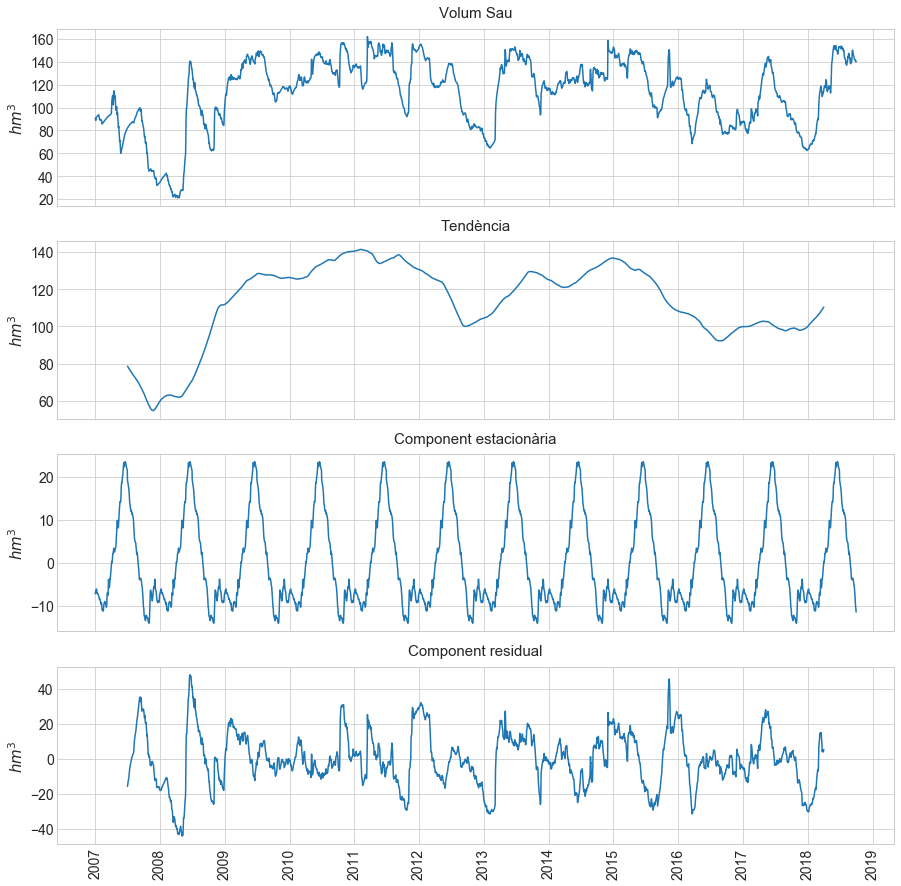

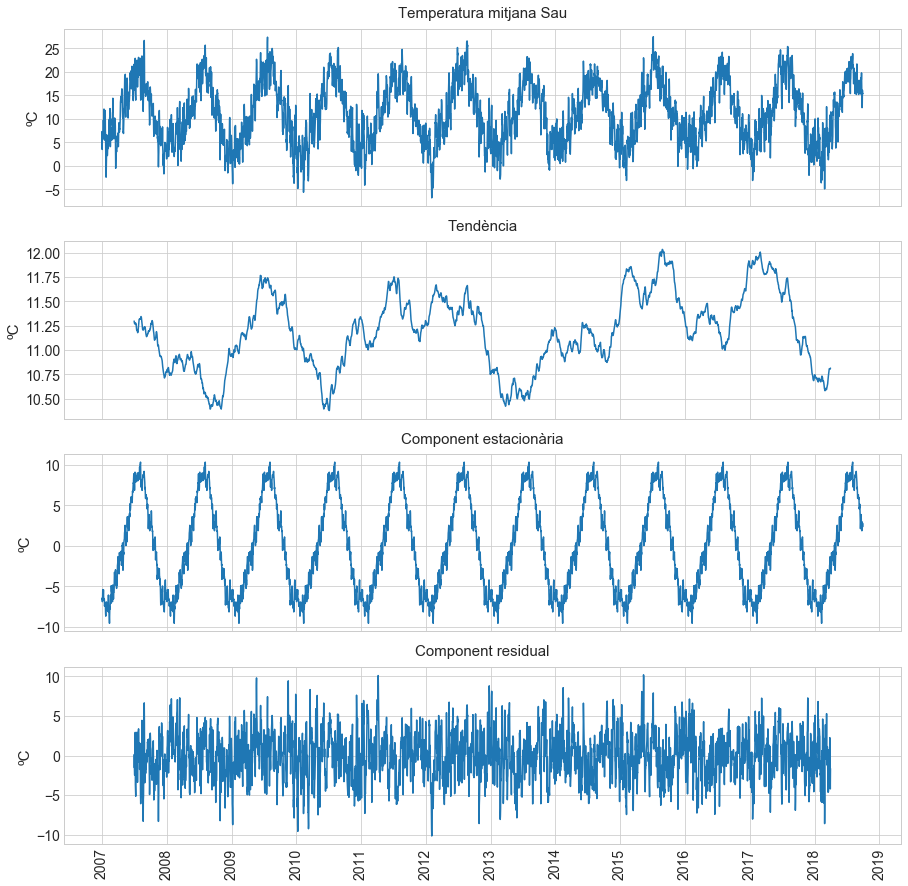

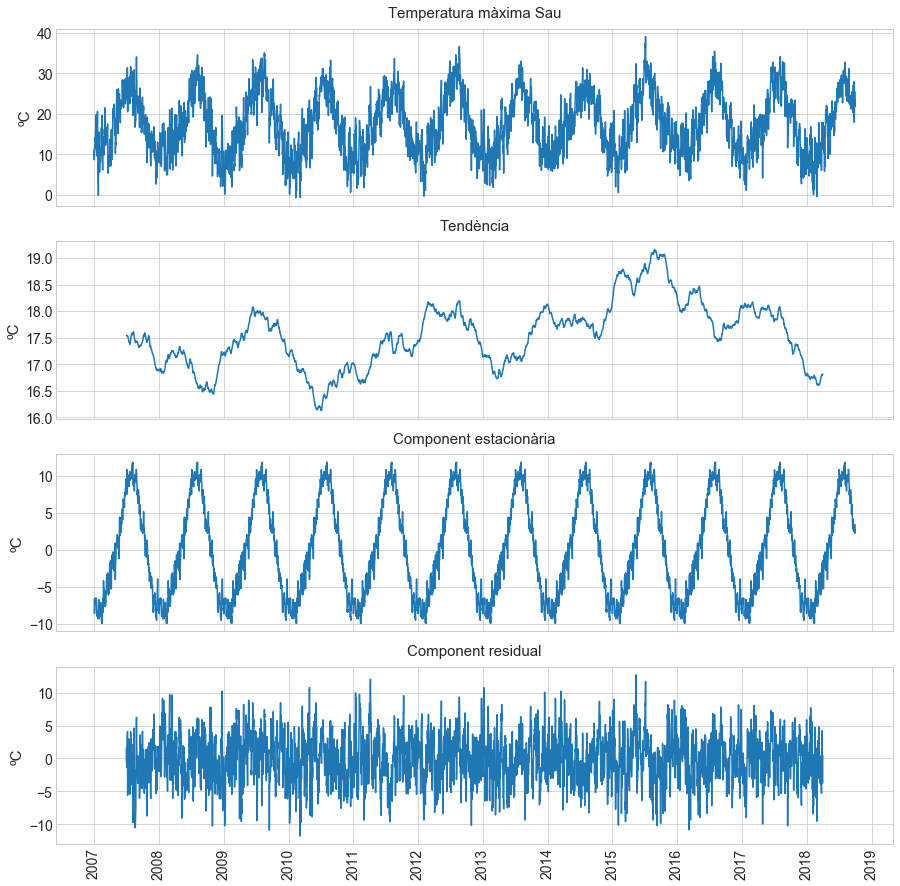

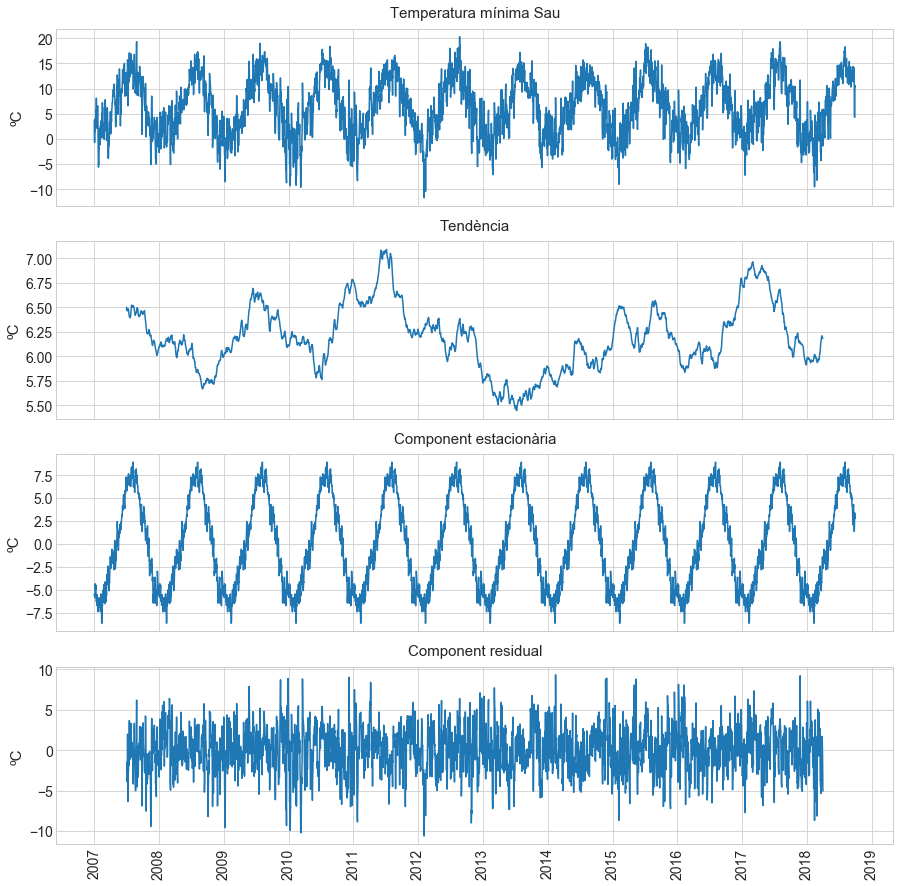

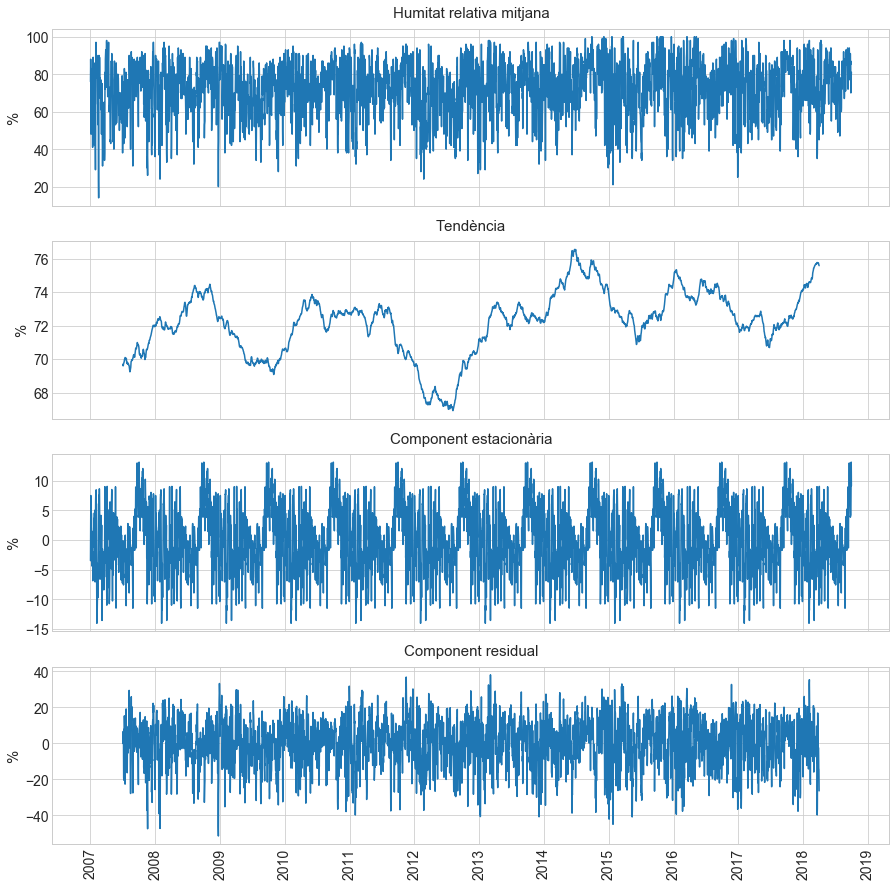

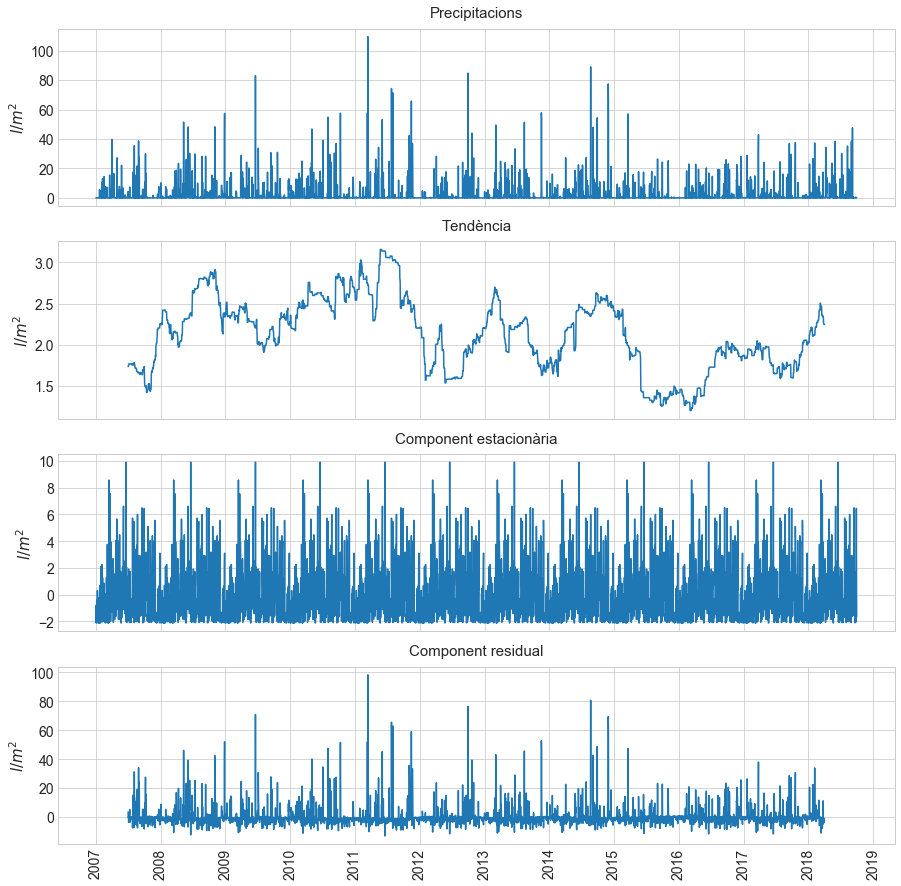

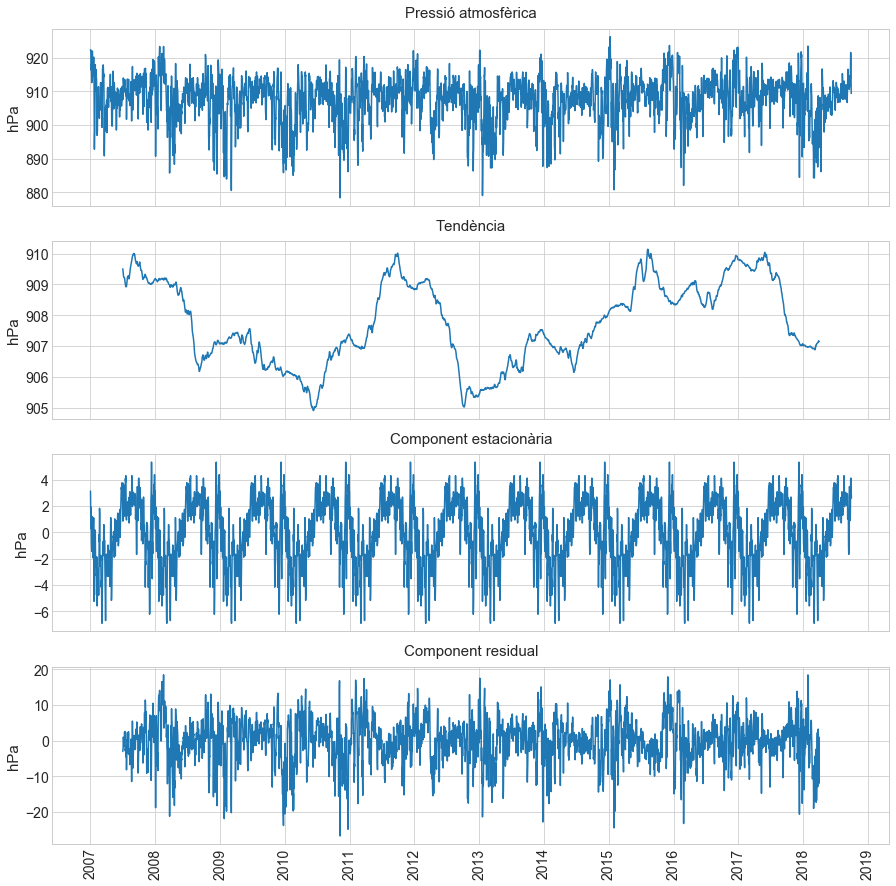

In [11]:
# -*- coding: utf-8 -*-

baellsDades = read_csv('dadesSauMultiDia.csv', sep=';',header=0, index_col=0)
baellsDades = pd.DataFrame(baellsDades.loc[baellsDades['Dia.1'] >= '2007-01-01'])

baellsDades['Dia.1'] = pd.to_datetime(baellsDades['Dia.1'], format='%Y/%m/%d')

display(baellsDades[0:10])

# Ejemplo de descomposición de serie de tiempo
descomp_serie = sm.tsa.seasonal_decompose(baellsDades['Volum'], model='additive', freq=365)  

var_graf = ((baellsDades['Dia.1'], descomp_serie.observed, 'Volum Sau','$hm^3$'),(baellsDades['Dia.1'], descomp_serie.trend, 'Tendència','$hm^3$'),
               (baellsDades['Dia.1'], descomp_serie.seasonal, 'Component estacionària','$hm^3$'),(baellsDades['Dia.1'], descomp_serie.resid, 'Component residual','$hm^3$'))

loadSau.grafica_series_multi(var_graf)

descomp_serie = sm.tsa.seasonal_decompose(baellsDades['TM'], model='additive', freq=365)  

var_graf = ((baellsDades['Dia.1'], descomp_serie.observed, 'Temperatura mitjana Sau','ºC'),(baellsDades['Dia.1'], descomp_serie.trend, 'Tendència','ºC'),
               (baellsDades['Dia.1'], descomp_serie.seasonal, 'Component estacionària','ºC'),(baellsDades['Dia.1'], descomp_serie.resid, 'Component residual','ºC'))

loadSau.grafica_series_multi(var_graf)

descomp_serie = sm.tsa.seasonal_decompose(baellsDades['TX'], model='additive', freq=365)  

var_graf = ((baellsDades['Dia.1'], descomp_serie.observed, 'Temperatura màxima Sau','ºC'),(baellsDades['Dia.1'], descomp_serie.trend, 'Tendència','ºC'),
               (baellsDades['Dia.1'], descomp_serie.seasonal, 'Component estacionària','ºC'),(baellsDades['Dia.1'], descomp_serie.resid, 'Component residual','ºC'))

loadSau.grafica_series_multi(var_graf)

descomp_serie = sm.tsa.seasonal_decompose(baellsDades['TN'], model='additive', freq=365)  

var_graf = ((baellsDades['Dia.1'], descomp_serie.observed, 'Temperatura mínima Sau','ºC'),(baellsDades['Dia.1'], descomp_serie.trend, 'Tendència','ºC'),
               (baellsDades['Dia.1'], descomp_serie.seasonal, 'Component estacionària','ºC'),(baellsDades['Dia.1'], descomp_serie.resid, 'Component residual','ºC'))

loadSau.grafica_series_multi(var_graf)

descomp_serie = sm.tsa.seasonal_decompose(baellsDades['HRM'], model='additive', freq=365)  

var_graf = ((baellsDades['Dia.1'], descomp_serie.observed, 'Humitat relativa mitjana','%'),(baellsDades['Dia.1'], descomp_serie.trend, 'Tendència','%'),
               (baellsDades['Dia.1'], descomp_serie.seasonal, 'Component estacionària','%'),(baellsDades['Dia.1'], descomp_serie.resid, 'Component residual','%'))

loadSau.grafica_series_multi(var_graf)

descomp_serie = sm.tsa.seasonal_decompose(baellsDades['PPT'], model='additive', freq=365)  

var_graf = ((baellsDades['Dia.1'], descomp_serie.observed, 'Precipitacions','$l/m^2$'),(baellsDades['Dia.1'], descomp_serie.trend, 'Tendència','$l/m^2$'),
               (baellsDades['Dia.1'], descomp_serie.seasonal, 'Component estacionària','$l/m^2$'),(baellsDades['Dia.1'], descomp_serie.resid, 'Component residual','$l/m^2$'))

loadSau.grafica_series_multi(var_graf)

descomp_serie = sm.tsa.seasonal_decompose(baellsDades['PM'], model='additive', freq=365)  

var_graf = ((baellsDades['Dia.1'], descomp_serie.observed, 'Pressió atmosfèrica','hPa'),(baellsDades['Dia.1'], descomp_serie.trend, 'Tendència','hPa'),
               (baellsDades['Dia.1'], descomp_serie.seasonal, 'Component estacionària','hPa'),(baellsDades['Dia.1'], descomp_serie.resid, 'Component residual','hPa'))

loadSau.grafica_series_multi(var_graf)

In [4]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
       
    #Perform Dickey-Fuller test:
    print ('Resultats del test de Dickey-Fuller:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    

#descomp_serie.resid.dropna(inplace=True)
#test_stationarity(descomp_serie.resid)
test_stationarity(baellsDades['Volum'])
test_stationarity(baellsDades['TM'])
test_stationarity(baellsDades['TX'])
test_stationarity(baellsDades['TN'])
test_stationarity(baellsDades['HRM'])
test_stationarity(baellsDades['PPT'])
test_stationarity(baellsDades['PM'])

Resultats del test de Dickey-Fuller:
Test Statistic                   -4.010595
p-value                           0.001356
#Lags Used                       31.000000
Number of Observations Used    4259.000000
Critical Value (1%)              -3.431886
Critical Value (5%)              -2.862219
Critical Value (10%)             -2.567131
dtype: float64
Resultats del test de Dickey-Fuller:
Test Statistic                   -3.637925
p-value                           0.005076
#Lags Used                       18.000000
Number of Observations Used    4272.000000
Critical Value (1%)              -3.431882
Critical Value (5%)              -2.862217
Critical Value (10%)             -2.567130
dtype: float64
Resultats del test de Dickey-Fuller:
Test Statistic                   -3.658011
p-value                           0.004744
#Lags Used                       19.000000
Number of Observations Used    4271.000000
Critical Value (1%)              -3.431882
Critical Value (5%)              -2.862217

In [13]:
summaryBaells = baellsDades.describe()
summaryBaells = summaryBaells.transpose()
display(summaryBaells)

,count,mean,std,min,25%,50%,75%,max
TM,4291.0,11.269518,6.420291,-6.800,6.10,11.100000,16.400,27.500
TX,4291.0,17.614053,7.419674,-0.800,11.60,17.400000,23.500,39.100
TN,4291.0,6.286530,5.675493,-11.700,1.90,6.300000,10.900,20.300
HRM,4291.0,72.243999,14.556517,14.000,63.00,74.000000,83.000,100.000
PPT,4291.0,2.133559,7.068774,0.000,0.00,0.000000,0.200,109.500
PM,4291.0,907.797180,6.580131,878.300,904.65,908.800000,912.000,926.300
Volum,4291.0,112.662052,30.063451,21.077,92.68,118.546378,137.251,161.885
